# *Monod* analysis

In the current notebook, we take the results of the *Monod* inference pipeline and compare the likelihood ratios between models. We inspect a series of human liver and mouse neuron cell types, and consider Markovian and non-Markovian model fits between single-cell and single-nucleus data.

## Metadata and prerequisites

Define the dataset metadata and disk locations.

In [1]:
# import sys
# sys.path.insert(0, '/home/ggorin/projects/monod/src/')

In [2]:
# import monod
# from monod import preprocess, extract_data, cme_toolbox, inference, analysis

In [1]:
# import pandas as pd
# import numpy as np
# import loompy as lp
# import matplotlib.pyplot as plt
# import scipy

## Load results and extract the key points

In [4]:
import pickle
import matplotlib.pyplot as plt
import numpy as np
import tqdm
from tqdm import tqdm

In [5]:
import pymc3 as pm
import theano.tensor as tt
import sys
sys.path.insert(0, '/home/ggorin/projects/monod/src/')
import monod
from monod import cme_toolbox

class LogLike(tt.Op):
    
    itypes = [tt.dvector] # expects a vector of parameter values when called
    otypes = [tt.dscalar] # outputs a single scalar value (the log likelihood)
    
    def __init__(self, mx, data, likelihood,n_cells):
        
        # add inputs as class attributes
        self.mx = mx
        self.data = data
        self.likelihood = likelihood
        self.n_cells = n_cells
        
    def perform(self, node, inputs, outputs):
        
        phi, = inputs # this contains parmeters
        logl = self.likelihood(phi, self.mx, self.data,self.n_cells) # calls the log-likelihood function
        outputs[0][0] = np.array(logl) # output the log-likelihood
def ll_bursty(p, mx, data,n_cells):
    return fitmodel_burst.eval_model_logL(p,mx,None,data,n_cells)
def ll_extrinsic(p, mx, data,n_cells):
    return fitmodel_ext.eval_model_logL(p,mx,None,data,n_cells)
def ll_delay(p, mx, data,n_cells):
    return fitmodel_delay.eval_model_logL(p,mx,None,data,n_cells)
def ll_delayedsplicing(p, mx, data,n_cells):
    return fitmodel_delsplic.eval_model_logL(p,mx,None,data,n_cells)
fitmodel_burst = monod.cme_toolbox.CMEModel('Bursty','None')
fitmodel_ext = monod.cme_toolbox.CMEModel('Extrinsic','None')
fitmodel_delay = monod.cme_toolbox.CMEModel('Delay','None')
fitmodel_delsplic = monod.cme_toolbox.CMEModel('DelayedSplicing','None')



these parameter names are wrong...

In [6]:
par_names_wrong = [['b','beta','gamma'],['alpha','beta','gamma'], ['alpha','beta','tauinv'],['alpha','tauinv','gamma']]



In [7]:
dir_string = '/home/ggorin/projects/GYP_2022/fits/smc_fits/raw/'
out_string = '/home/ggorin/projects/GYP_2022/fits/smc_fits/'
dataset_meta = ['B08','A02']
cluster_names = ['Glutamatergic','GABAergic']
allen_dataset_names = ['allen_'+x+'_'+y for x in dataset_meta for y in cluster_names]
# allen_dataset_strings = [dir_string + '/' + x for x in dataset_names]
dataset_meta = ['sc','sn']

cluster_names = ['CentralHep','PortalHep','InterHep']
liver_dataset_names = ['liver_c72_'+x+'_'+y for x in dataset_meta for y in cluster_names]
# liver_dataset_strings = [x for x in dataset_names]
dataset_names = allen_dataset_names + liver_dataset_names

In [8]:
models = ['bursty','extrinsic','delay','delayedsplicing']
for dataset in tqdm(dataset_names):
    for model_ind,model in enumerate(models):
        raw_str = dir_string+dataset+'_'+model+'.pickle'
        out_str = out_string+dataset+'_'+model+'.pickle'
        
        with open(raw_str, 'rb') as f:
            trace_pickle = pickle.load(f)
            
        n_genes = len(trace_pickle)
        n_steps = 1000
        trace_variable_values = np.zeros((n_genes,3,n_steps))
        lml_values = np.zeros(n_genes)
        
        for i in range(n_genes):
            lml_values[i] = trace_pickle[i].report.log_marginal_likelihood
            for var_ in range(3):
                trace_variable_values[i,var_,:] = getattr(trace_pickle[i],par_names_wrong[model_ind][var_])
        with open(out_str, 'wb') as f:
            pickle.dump((trace_variable_values,lml_values),f)
        
                
#         print(raw_str)
#         print(out_str)
#         print('---')

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [1:03:54<00:00, 383.44s/it]


In [93]:
# trace_pickle=bursty

In [61]:
# import numpy as np

In [63]:
# model_ind=0
# n_genes = len(trace_pickle)
# trace_variable_values = np.zeros((n_genes,3,1000))
# lml_values = np.zeros(n_genes)
# for i in range(n_genes):
#     lml_values[i] = trace_pickle[i].report.log_marginal_likelihood
#     for var_ in range(3):
#         trace_variable_values[i,var_,:] = getattr(trace_pickle[i],par_names_wrong[model_ind][var_])

## Reload

In [34]:
import pickle
import matplotlib.pyplot as plt
import numpy as np
import tqdm
from tqdm import tqdm
import scipy
from scipy import stats

In [43]:
dir_string = '/home/ggorin/projects/GYP_2022/fits/smc_fits/raw/'
out_string = '/home/ggorin/projects/GYP_2022/fits/smc_fits/'
dataset_meta = ['B08','A02']
cluster_names_allen = ['Glutamatergic','GABAergic']
allen_dataset_names = ['allen_'+x+'_'+y for x in dataset_meta for y in cluster_names_allen]
# allen_dataset_strings = [dir_string + '/' + x for x in dataset_names]
dataset_meta = ['sc','sn']

cluster_names_liver = ['CentralHep','PortalHep','InterHep']
liver_dataset_names = ['liver_c72_'+x+'_'+y for x in dataset_meta for y in cluster_names_liver]
# liver_dataset_strings = [x for x in dataset_names]
dataset_names = allen_dataset_names + liver_dataset_names

In [36]:
BFs_allen.shape

(4, 3, 1319)

In [54]:
models = ['bursty','extrinsic','delay','delayedsplicing']

out_str = out_string+allen_dataset_names[0]+'_'+models[0]+'.pickle'
with open(out_str, 'rb') as f:
    trace_variable_values,lml_values=pickle.load(f)
n_genes_allen = len(lml_values)

out_str = out_string+liver_dataset_names[0]+'_'+models[0]+'.pickle'
with open(out_str, 'rb') as f:
    trace_variable_values,lml_values=pickle.load(f)
n_genes_liver = len(lml_values)

BFs_allen = np.zeros((len(allen_dataset_names),3,n_genes_allen))
BFs_liver = np.zeros((len(liver_dataset_names),3,n_genes_liver))

for dataset_ind,dataset in enumerate(allen_dataset_names):
    for model_ind,model in enumerate(models):
        out_str = out_string+dataset+'_'+model+'.pickle'
        with open(out_str, 'rb') as f:
            trace_variable_values,lml_values=pickle.load(f)
        if model_ind==0:
            LML_bursty = lml_values
        else:
            BFs_allen[dataset_ind,model_ind-1,:] = (lml_values-LML_bursty)/np.log(10)
        
                
for dataset_ind,dataset in enumerate(liver_dataset_names):
    for model_ind,model in enumerate(models):
        out_str = out_string+dataset+'_'+model+'.pickle'
        with open(out_str, 'rb') as f:
            trace_variable_values,lml_values=pickle.load(f)
        if model_ind==0:
            LML_bursty = lml_values
        else:
            BFs_liver[dataset_ind,model_ind-1,:] = (lml_values-LML_bursty)/np.log(10)

#         print(raw_str)
#         print(out_str)
#         print('---')

In [39]:
(BFs_allen>0).mean(2)

array([[0.29946929, 0.57391964, 0.        ],
       [0.41849886, 0.70507961, 0.0030326 ],
       [0.18271418, 0.37755876, 0.26686884],
       [0.24715694, 0.45943897, 0.27141774]])

In [65]:
allen_dataset_names

['allen_B08_Glutamatergic',
 'allen_B08_GABAergic',
 'allen_A02_Glutamatergic',
 'allen_A02_GABAergic']

(array([  1.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,   2.,   1.,
          0.,   1.,   1.,   1.,   1.,   0.,   0.,   2.,   0.,   1.,   2.,
          3.,   1.,   0.,   4.,   5.,   5.,   7.,  13.,  12.,  20.,  23.,
         38.,  49.,  54., 115., 221., 431., 122.,  63.,  36.,  30.,  12.,
          9.,  10.,   6.,   5.,   5.,   6.]),
 array([-1503.00987188, -1464.16738356, -1425.32489524, -1386.48240692,
        -1347.6399186 , -1308.79743028, -1269.95494196, -1231.11245364,
        -1192.26996532, -1153.427477  , -1114.58498868, -1075.74250036,
        -1036.90001204,  -998.05752372,  -959.2150354 ,  -920.37254708,
         -881.53005876,  -842.68757044,  -803.84508212,  -765.0025938 ,
         -726.16010548,  -687.31761717,  -648.47512885,  -609.63264053,
         -570.79015221,  -531.94766389,  -493.10517557,  -454.26268725,
         -415.42019893,  -376.57771061,  -337.73522229,  -298.89273397,
         -260.05024565,  -221.20775733,  -182.36526901,  -143.52278069,
         -

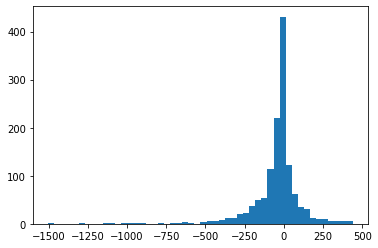

In [67]:
plt.hist(BFs_allen[0,0,:],50)

extrinsic
allen_B08_Glutamatergic
allen_A02_Glutamatergic
allen_B08_GABAergic
allen_A02_GABAergic
delay
allen_B08_Glutamatergic
allen_A02_Glutamatergic
allen_B08_GABAergic
allen_A02_GABAergic


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


delayedsplicing
allen_B08_Glutamatergic
allen_A02_Glutamatergic
allen_B08_GABAergic
allen_A02_GABAergic


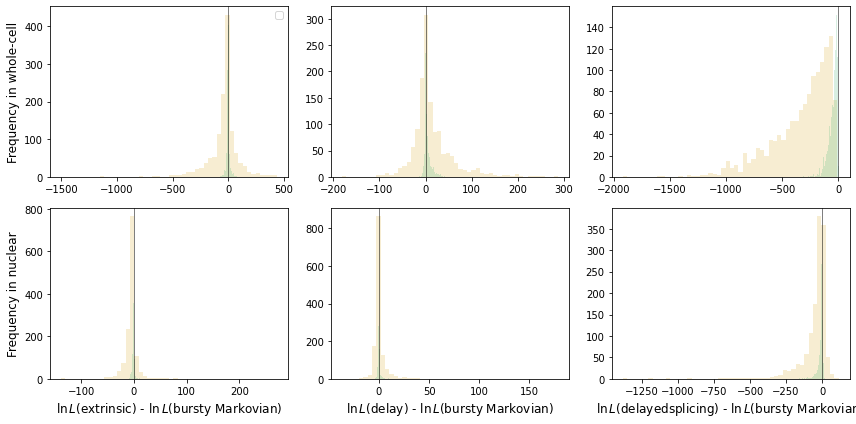

In [70]:
fig1,ax1=plt.subplots(2,3,figsize=(12,6))
fs=12
alf =0.5
colors = ('goldenrod','mediumseagreen','lightgray')
# cluster
model_names = models[1:]
kdes_allen = np.empty((3,2,2),dtype=object) #model, cell type, tech

for model_index in range(3):
    print(model_names[model_index])
    for cluster_index,di in enumerate([[0,2],[1,3]]):
        print(allen_dataset_names[di[0]])
#         print(cluster_names_allen[cluster_index])
        
        lim = 100
        linsp_n = 300
        sc_bf = BFs_allen[di[0],model_index]
        ax1[0,model_index].hist(sc_bf,50,alpha=0.2,color=colors[cluster_index])
#         sc_kde=scipy.stats.gaussian_kde(sc_bf,bw_method=0.02)
#         x = np.linspace(-lim,lim,linsp_n)
#         ax1[0,model_index].plot(x,sc_kde(x),\
#                              label=f'{cluster_names_allen[cluster_index]}',color=colors[cluster_index])
        print(allen_dataset_names[di[1]])
        lim = 50
        sn_bf = BFs_allen[di[1],model_index]
        sn_kde=scipy.stats.gaussian_kde(sn_bf,bw_method=0.02)
        x = np.linspace(-lim,lim,linsp_n)
        ax1[1,model_index].hist(sn_bf,50,alpha=0.2,color=colors[cluster_index])
#         ax1[1,model_index].plot(x,sn_kde(x),\
#                              label=f'{cluster_names_allen[cluster_index]}',color=colors[cluster_index])
        
        kdes_allen[model_index,cluster_index,0] = sc_kde
        kdes_allen[model_index,cluster_index,1] = sn_kde
        
        

    for i in range(2):
        yl = ax1[i,model_index].get_ylim()
        ax1[i,model_index].plot([0,0],yl,'k-',linewidth=.5)
        ax1[i,model_index].set_ylim(yl)
    ax1[1,model_index].set_xlabel(fr'$\ln L$({model_names[model_index]}) - $\ln L$(bursty Markovian)',fontsize=fs)
ax1[0,0].set_ylabel('Frequency in whole-cell',fontsize=fs)
ax1[1,0].set_ylabel('Frequency in nuclear',fontsize=fs)
ax1[0,0].legend()
fig1.tight_layout()
# plt.savefig('./fig/likelihood_ratio_allen.png',dpi=450)

## Liver

In [45]:
BFs_liver.shape

(6, 3, 1319)

In [46]:
di[0]

0

In [52]:
BFs_liver

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]])

extrinsic
CentralHep
PortalHep
InterHep
delay
CentralHep
PortalHep
InterHep
delayedsplicing
CentralHep
PortalHep
InterHep


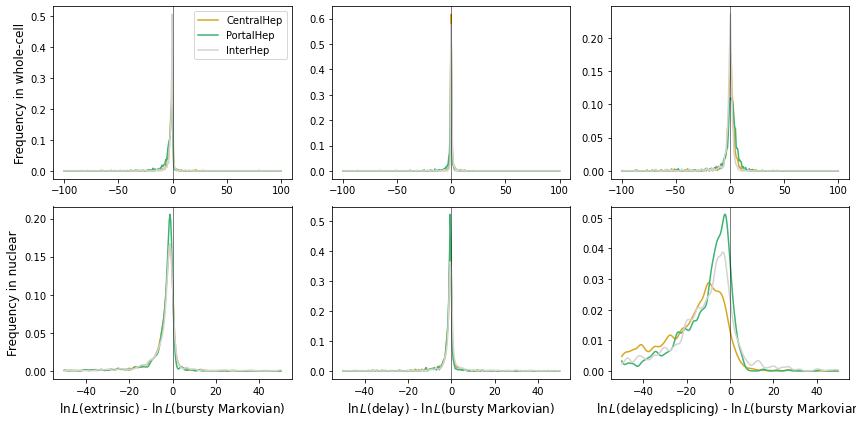

In [55]:
fig1,ax1=plt.subplots(2,3,figsize=(12,6))
fs=12
alf =0.5
colors = ('goldenrod','mediumseagreen','lightgray')
# cluster
model_names = models[1:]
kdes_liver = np.empty((3,3,2),dtype=object) #model, cell type, tech

for model_index in range(3):
    print(model_names[model_index])
    for cluster_index,di in enumerate([[0,3],[1,4],[2,5]]):
        print(cluster_names_liver[cluster_index])
        
        lim = 100
        linsp_n = 300
        sc_bf = BFs_liver[di[0],model_index]
        sc_kde=scipy.stats.gaussian_kde(sc_bf,bw_method=0.02)
        x = np.linspace(-lim,lim,linsp_n)
        ax1[0,model_index].plot(x,sc_kde(x),\
                             label=f'{cluster_names_liver[cluster_index]}',color=colors[cluster_index])
        
        lim = 50
        sn_bf = BFs_liver[di[1],model_index]
        sn_kde=scipy.stats.gaussian_kde(sn_bf,bw_method=0.02)
        x = np.linspace(-lim,lim,linsp_n)
        ax1[1,model_index].plot(x,sn_kde(x),\
                             label=f'{cluster_names_liver[cluster_index]}',color=colors[cluster_index])
        
        kdes_liver[model_index,cluster_index,0] = sc_kde
        kdes_liver[model_index,cluster_index,1] = sn_kde
        
        

    for i in range(2):
        yl = ax1[i,model_index].get_ylim()
        ax1[i,model_index].plot([0,0],yl,'k-',linewidth=.5)
        ax1[i,model_index].set_ylim(yl)
    ax1[1,model_index].set_xlabel(fr'$\ln L$({model_names[model_index]}) - $\ln L$(bursty Markovian)',fontsize=fs)
ax1[0,0].set_ylabel('Frequency in whole-cell',fontsize=fs)
ax1[1,0].set_ylabel('Frequency in nuclear',fontsize=fs)
ax1[0,0].legend()
fig1.tight_layout()
# plt.savefig('./fig/likelihood_ratio_allen.png',dpi=450)

In [12]:
# dataset_meta = ['sc','sn']
# cluster_names = ['CentralHep','PortalHep','InterHep']
# dataset_names = ['liver_c72_'+x+'_'+y for x in dataset_meta for y in cluster_names]
# dir_string = './fits/gg_220909_024_liver_andrews_2'
# dataset_strings = [dir_string + '/' + x for x in dataset_names]
# models = ['Extrinsic','Bursty','Delay','DelayedSplicing']
# model_names=('delayed deg.','extrinsic','delayed splic.')
# n_models = len(models)
# n_datasets = len(dataset_names)

In [13]:
# sr_arr_full = [[monod.analysis.load_search_results(dataset_strings[i] + '/' + models[j] + '_None_1x1/grid_scan_results_upd.res') for j in range(len(models))] for i in range(n_datasets)]
sd_arr = [monod.analysis.load_search_data(dir_string+'/'+x+'/raw.sd') for x in dataset_names]
# model_logL = [[sr.get_logL(sd) for sr in x] for x,sd in zip(sr_arr_full,sd_arr)]
# model_logL = np.asarray(model_logL)

In [99]:
tot_wc_liver = np.asarray([[sd_arr[j].layers[0].sum(),sd_arr[j].layers[1].sum()] for j in range(len(cluster_names))],dtype=float)
tot_nuc_liver = np.asarray([[sd_arr[j+len(cluster_names)].layers[0].sum(),sd_arr[j+len(cluster_names)].layers[1].sum()] for j in range(len(cluster_names))],dtype=float)
tot_wc_liver /= tot_wc_liver.sum(1)[:,None]
tot_nuc_liver /= tot_nuc_liver.sum(1)[:,None]

delayed deg.
CentralHep
PortalHep
InterHep
extrinsic
CentralHep
PortalHep
InterHep
delayed splic.
CentralHep
PortalHep
InterHep


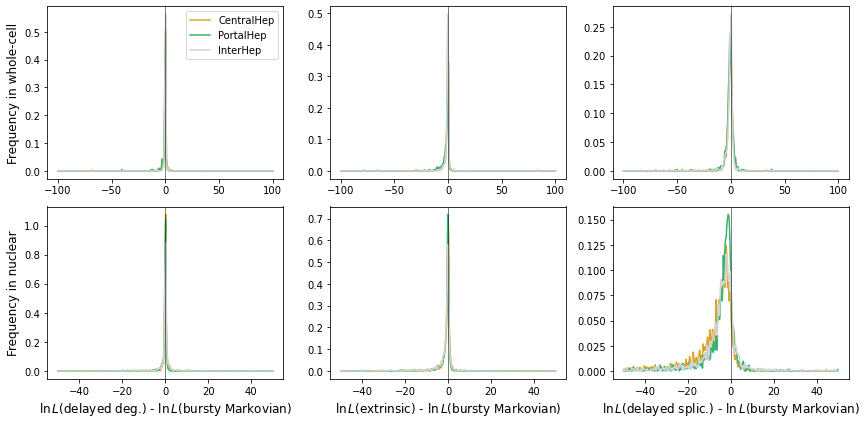

In [100]:
# fig1,ax1=plt.subplots(2,3,figsize=(12,6))
# fs=12
# alf =0.5
# colors = ('goldenrod','mediumseagreen','lightgray')

# kdes_liver = np.empty((3,3,2),dtype=object)

# for model_index,mi in enumerate([[2,1],[0,1],[3,1]]):
#     print(model_names[model_index])
#     for cluster_index,di in enumerate([[0,3],[1,4],[2,5]]):
#         print(cluster_names[cluster_index])
        
#         lim = 100
#         linsp_n = 300
#         sc_lr=model_logL[di[0],mi[0]] - model_logL[di[0],1]
#         sc_lr = sc_lr[np.abs(sc_lr)<lim]
#         sc_kde=scipy.stats.gaussian_kde(sc_lr,bw_method=0.01)
#         x = np.linspace(-lim,lim,linsp_n)
#         ax1[0,model_index].plot(x,sc_kde(x),\
#                              label=f'{cluster_names[cluster_index]}',color=colors[cluster_index])
        
#         lim = 50
#         sn_lr=model_logL[di[1],mi[0]] - model_logL[di[1],1]
#         sn_lr = sn_lr[np.abs(sn_lr)<lim]
#         sn_kde=scipy.stats.gaussian_kde(sn_lr,bw_method=0.01)
#         x = np.linspace(-lim,lim,linsp_n)
#         ax1[1,model_index].plot(x,sn_kde(x),\
#                              label=f'{cluster_names[cluster_index]}',color=colors[cluster_index])
        
#         kdes_liver[model_index,cluster_index,0] = sc_kde
#         kdes_liver[model_index,cluster_index,1] = sn_kde
        
        

#     for i in range(2):
#         yl = ax1[i,model_index].get_ylim()
#         ax1[i,model_index].plot([0,0],yl,'k-',linewidth=.5)
#         ax1[i,model_index].set_ylim(yl)
#     ax1[1,model_index].set_xlabel(fr'$\ln L$({model_names[model_index]}) - $\ln L$(bursty Markovian)',fontsize=fs)
# ax1[0,0].set_ylabel('Frequency in whole-cell',fontsize=fs)
# ax1[1,0].set_ylabel('Frequency in nuclear',fontsize=fs)
# ax1[0,0].legend()
# fig1.tight_layout()
# plt.savefig('./fig/likelihood_ratio_liver.png',dpi=450)

## Joint

Plot KDEs of likelihood ratios.

In [56]:
kdes_allen.shape

(3, 2, 2)

In [57]:
kdes_liver.shape

(3, 3, 2)

In [58]:
kdes = np.concatenate((kdes_allen,kdes_liver),axis=1)

In [59]:
cluster_names = ['Glutamatergic','GABAergic','CentralHep','PortalHep','InterHep']

In [323]:
model_names_axes = ('extrinsic','delayed deg.','delayed splic.')

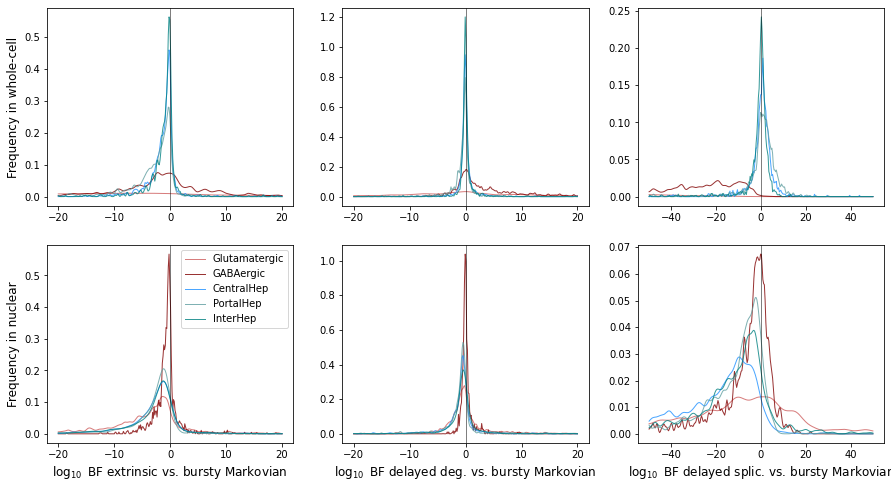

In [330]:
fig1,ax1=plt.subplots(2,3,figsize=(15,8))
colors = ('indianred','maroon','dodgerblue','cadetblue','teal')

for tech in range(2):
    for model_index in range(3):
        for cluster_index in range(5):
            kde = kdes[model_index,cluster_index,tech]
#             lim=50
            lim = 50 if model_index==2 else 20
            linsp_n = 300
            x = np.linspace(-lim,lim,linsp_n)
            ax1[tech,model_index].plot(x,kde(x),\
                                 label=f'{cluster_names[cluster_index]}',\
                                 color=colors[cluster_index],alpha=0.8,linewidth=1)

        yl = ax1[tech,model_index].get_ylim()
        ax1[tech,model_index].plot([0,0],yl,'k-',linewidth=.5)
        ax1[tech,model_index].set_ylim(yl)

for model_index in range(3):
    ax1[1,model_index].set_xlabel(r'$\log_{10}$ BF '+f'{model_names_axes[model_index]} vs. bursty Markovian',fontsize=fs)
ax1[1,0].legend()
ax1[0,0].set_ylabel('Frequency in whole-cell',fontsize=fs)
ax1[1,0].set_ylabel('Frequency in nuclear',fontsize=fs)
plt.savefig('./fig/fig3b.png',dpi=450)



In [106]:
sr_arr_full[0][0].sp.gradient_params

{'max_iterations': 15, 'init_pattern': 'moments', 'num_restarts': 5}

In [107]:
sr_arr_full[0][0].n_genes

3000

In [108]:
tot_wc = np.concatenate((tot_wc_allen,tot_wc_liver),axis=0)
tot_nuc = np.concatenate((tot_nuc_allen,tot_nuc_liver),axis=0)

Plot the unspliced count fractions.

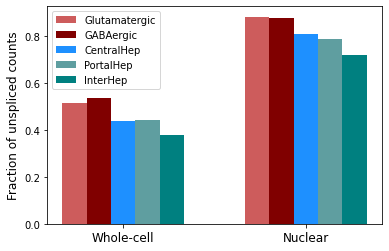

In [141]:
plt.bar(np.arange(5)*0.2-0.4,tot_wc[:,0],0.2,color=colors)
plt.bar(np.arange(5)*0.2+1.1,tot_nuc[:,0],0.2,color=colors)
plt.xticks([0,1.5],('Whole-cell','Nuclear'),fontsize=12)
plt.ylabel('Fraction of unspliced counts',fontsize=12)
from matplotlib.patches import Rectangle

handles = [Rectangle((0,0),1,1,color=c,ec="None") for c in colors]
plt.legend(handles, cluster_names)
plt.savefig('./fig/U_fraction.png',dpi=450)


In [299]:
dataset_index = 2

In [300]:
traces = []
lmls = []
for model_ind,model in enumerate(models):
    out_str = out_string+allen_dataset_names[dataset_index]+'_'+model+'.pickle'
    with open(out_str, 'rb') as f:
        trace_variable_values,lml_values=pickle.load(f)
    traces.append(trace_variable_values)
    lmls.append(lml_values)

In [301]:
bfs_targ = BFs_allen[dataset_index,1,:]

In [302]:
bfs_targ.shape

(1319,)

In [303]:
traces[0].shape

(1319, 3, 1000)

In [304]:
means_ = traces[2][:,0,:].mean(1) - traces[2][:,1,:].mean(1)
means_2 = traces[0][:,0,:].mean(1) - traces[0][:,1,:].mean(1)

In [305]:
lmls = np.asarray(lmls)

In [306]:
wts = np.exp(lmls-scipy.special.logsumexp(lmls,0))

In [307]:
wts

array([[4.27635952e-264, 9.97811661e-001, 1.00000000e+000, ...,
        4.05110520e-002, 9.70671751e-009, 6.45177125e-018],
       [1.00000000e+000, 6.36992696e-008, 3.93166464e-042, ...,
        4.84523583e-002, 1.00017420e-027, 1.44153119e-149],
       [1.93882882e-120, 2.18827494e-003, 4.19747839e-013, ...,
        9.11036590e-001, 9.99999990e-001, 1.00000000e+000],
       [0.00000000e+000, 4.62524318e-136, 1.48645672e-164, ...,
        2.36218675e-016, 2.57918868e-208, 1.40054630e-238]])

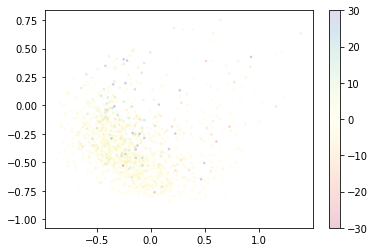

In [308]:
pars = [0,1]
plt.scatter(traces[2][:,pars[0],:].mean(1),traces[2][:,pars[1],:].mean(1),3,bfs_targ,alpha=0.2,cmap='Spectral',
           vmin=-30,vmax=30)
plt.colorbar()

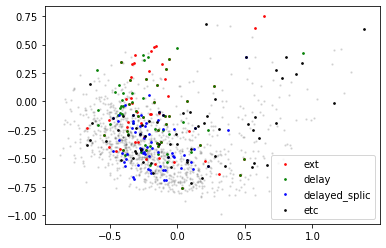

In [309]:
pars = [0,1]
x=traces[2][:,pars[0],:].mean(1)
y=traces[2][:,pars[1],:].mean(1)

plt.scatter(x,y,2,'k',alpha=0.1)

bfs_targ = BFs_allen[dataset_index,0,:]
cf = bfs_targ>np.quantile(bfs_targ,0.95)
plt.scatter(x[cf],y[cf],3,'r',alpha=0.9,label='ext')

bfs_targ = BFs_allen[dataset_index,1,:]
cf = bfs_targ>np.quantile(bfs_targ,0.95)
plt.scatter(x[cf],y[cf],3,'g',alpha=0.9,label='delay')


bfs_targ = BFs_allen[dataset_index,2,:]
cf = bfs_targ>np.quantile(bfs_targ,0.95)
plt.scatter(x[cf],y[cf],3,'b',alpha=0.9,label='delayed_splic')

bfs_targ = BFs_allen[dataset_index,1,:]
cf = bfs_targ<np.quantile(bfs_targ,0.05)
plt.scatter(x[cf],y[cf],3,'k',alpha=0.9,label='etc')


plt.legend()


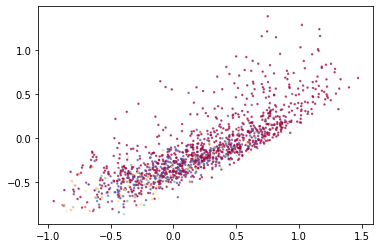

In [310]:
# plt.scatter(,3,'gray',alpha=0.4)

x=means_
y=traces[2][:,0,:].mean(1)

plt.scatter(x,y,2,'gray',alpha=0.1)

bfs_targ = BFs_allen[dataset_index,2,:]
plt.scatter(x,y,2,bfs_targ,alpha=0.6,cmap='Spectral',vmin=-5,vmax=5)
# bfs_targ = BFs_allen[2,0,:]
# plt.scatter(x,y,2,bfs_targ,alpha=0.6,cmap='Spectral',vmin=-30,vmax=30)



# bfs_targ = BFs_allen[2,0,:]
# cf = bfs_targ>np.quantile(bfs_targ,0.95)
# plt.scatter(x[cf],y[cf],3,'r',alpha=0.9,label='ext')

# bfs_targ = BFs_allen[2,1,:]
# cf = bfs_targ>np.quantile(bfs_targ,0.95)
# plt.scatter(x[cf],y[cf],3,'g',alpha=0.9,label='delay')


# bfs_targ = BFs_allen[2,2,:]
# cf = bfs_targ>np.quantile(bfs_targ,0.95)
# plt.scatter(x[cf],y[cf],3,'b',alpha=0.9,label='delayed_splic')

# bfs_targ = BFs_allen[2,1,:]
# cf = bfs_targ<np.quantile(bfs_targ,0.05)
# plt.scatter(x[cf],y[cf],3,'k',alpha=0.9,label='etc')


In [311]:
len(traces)

4

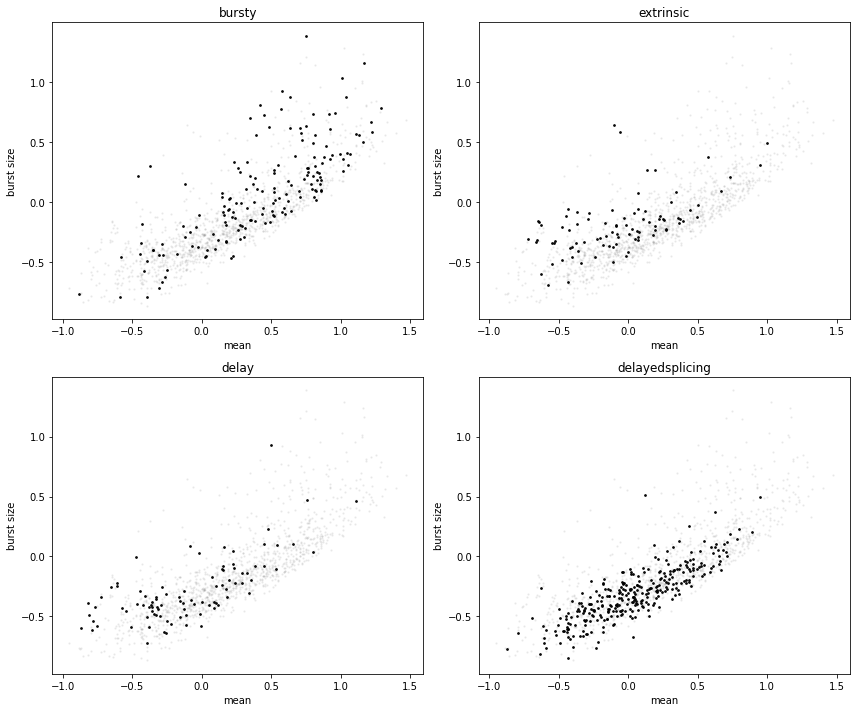

In [312]:
# plt.scatter(,3,'gray',alpha=0.4)

fig1,ax1=plt.subplots(2,2,figsize=(12,10))
x=means_
y=traces[2][:,0,:].mean(1)

for i in range(4):
    axl = np.unravel_index(i,[2,2])
    ax1[axl].scatter(x,y,2,'gray',alpha=0.1)
    bfs_targ = wts[i]
    cf = bfs_targ>0.99
    # cf = bfs_targ>np.quantile(bfs_targ,0.95)
    ax1[axl].scatter(x[cf],y[cf],3,'k',alpha=0.9)
    ax1[axl].set_xlabel('mean')
    ax1[axl].set_ylabel('burst size')
    ax1[axl].set_title(models[i])
fig1.tight_layout()

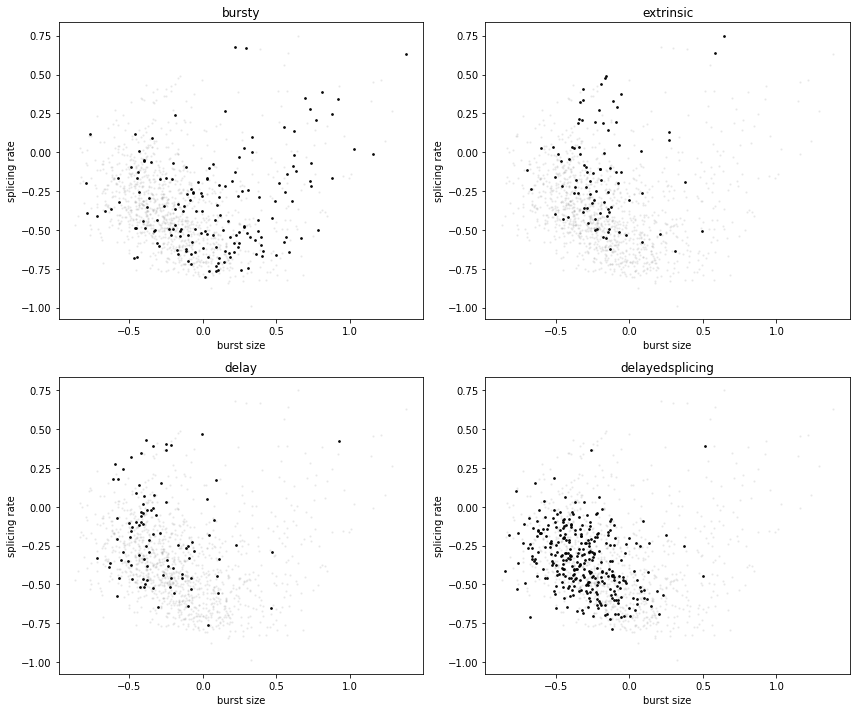

In [313]:
# plt.scatter(,3,'gray',alpha=0.4)
pars = [0,1]

fig1,ax1=plt.subplots(2,2,figsize=(12,10))
x=traces[2][:,pars[0],:].mean(1)
y=traces[2][:,pars[1],:].mean(1)
for i in range(4):
    axl = np.unravel_index(i,[2,2])
    ax1[axl].scatter(x,y,2,'gray',alpha=0.1)
    bfs_targ = wts[i]
    cf = bfs_targ>0.99
    # cf = bfs_targ>np.quantile(bfs_targ,0.95)
    ax1[axl].scatter(x[cf],y[cf],3,'k',alpha=0.9)
    ax1[axl].set_ylabel('splicing rate')
    ax1[axl].set_xlabel('burst size')
    ax1[axl].set_title(models[i])
fig1.tight_layout()

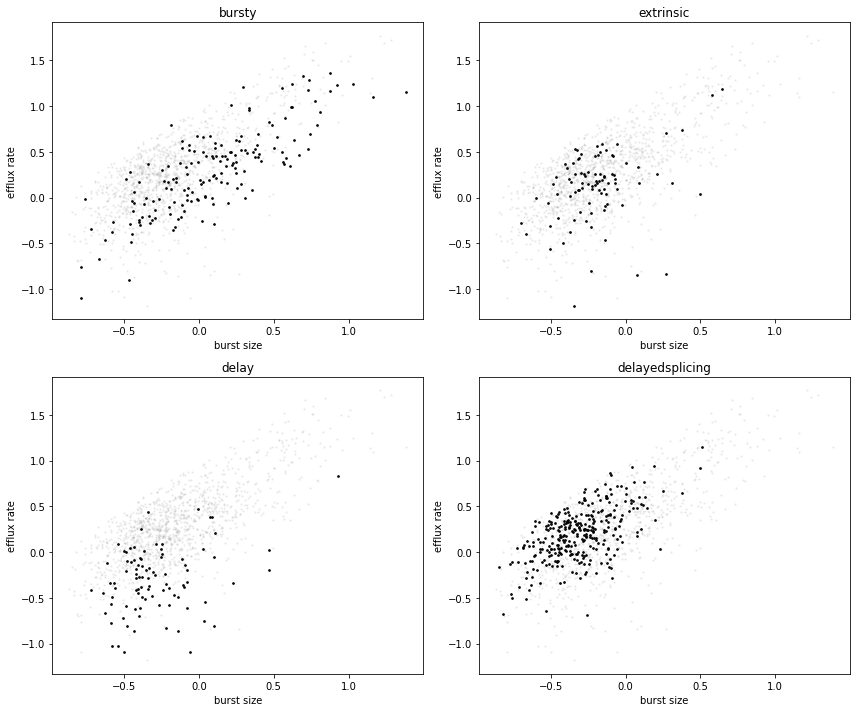

In [314]:
# plt.scatter(,3,'gray',alpha=0.4)
pars = [0,2]

fig1,ax1=plt.subplots(2,2,figsize=(12,10))
x=traces[2][:,pars[0],:].mean(1)
y=traces[2][:,pars[1],:].mean(1)
for i in range(4):
    axl = np.unravel_index(i,[2,2])
    ax1[axl].scatter(x,y,2,'gray',alpha=0.1)
    bfs_targ = wts[i]
    cf = bfs_targ>0.99
    # cf = bfs_targ>np.quantile(bfs_targ,0.95)
    ax1[axl].scatter(x[cf],y[cf],3,'k',alpha=0.9)
    ax1[axl].set_xlabel('burst size')
    ax1[axl].set_ylabel('efflux rate')
    ax1[axl].set_title(models[i])
fig1.tight_layout()

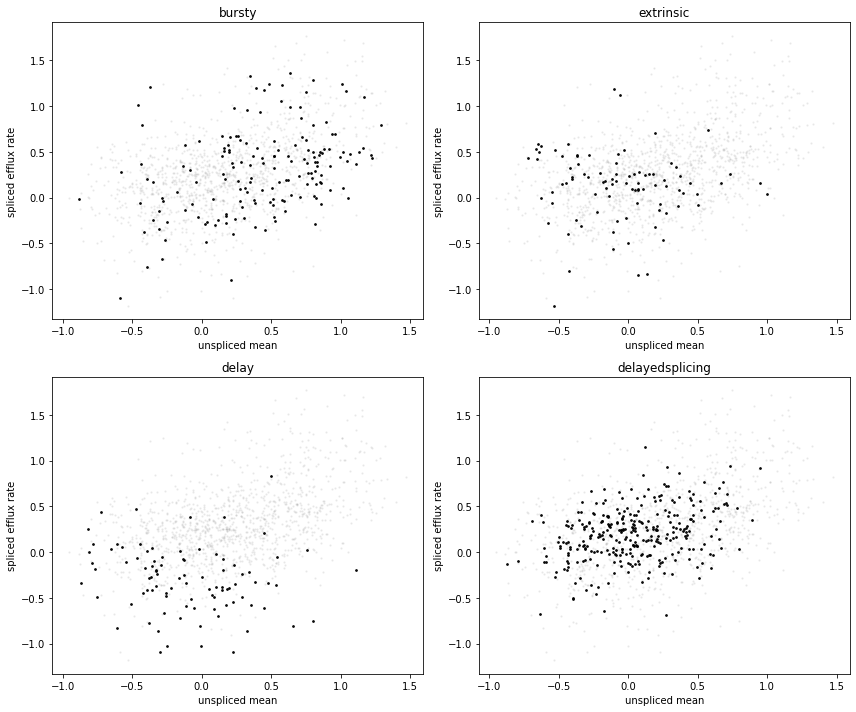

In [315]:
# plt.scatter(,3,'gray',alpha=0.4)
pars = [0,2]

fig1,ax1=plt.subplots(2,2,figsize=(12,10))
x=means_
y=traces[2][:,pars[1],:].mean(1)
for i in range(4):
    axl = np.unravel_index(i,[2,2])
    ax1[axl].scatter(x,y,2,'gray',alpha=0.1)
    bfs_targ = wts[i]
    cf = bfs_targ>0.99
    # cf = bfs_targ>np.quantile(bfs_targ,0.95)
    ax1[axl].scatter(x[cf],y[cf],3,'k',alpha=0.9)
    ax1[axl].set_xlabel('unspliced mean')
    ax1[axl].set_ylabel('spliced efflux rate')
    ax1[axl].set_title(models[i])
fig1.tight_layout()

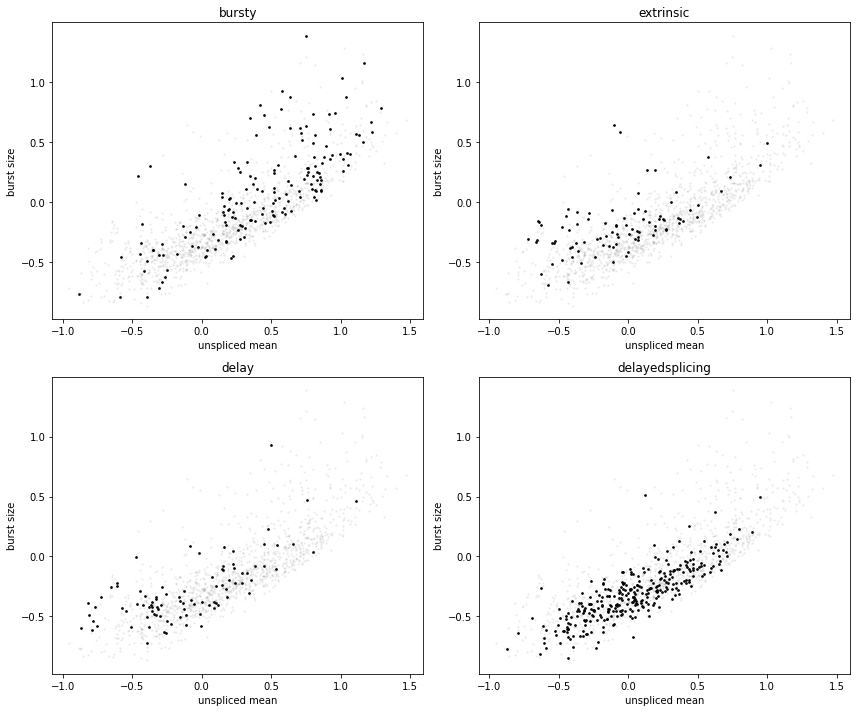

In [316]:
# plt.scatter(,3,'gray',alpha=0.4)
pars = [2,0]

fig1,ax1=plt.subplots(2,2,figsize=(12,10))
x=means_
# x=traces[2][:,pars[0],:].mean(1)
y=traces[2][:,pars[1],:].mean(1)
# x=means_
for i in range(4):
    axl = np.unravel_index(i,[2,2])
    ax1[axl].scatter(x,y,2,'gray',alpha=0.1)
    bfs_targ = wts[i]
    cf = bfs_targ>0.99
    # cf = bfs_targ>np.quantile(bfs_targ,0.95)
    ax1[axl].scatter(x[cf],y[cf],3,'k',alpha=0.9)
    ax1[axl].set_xlabel('unspliced mean')
    ax1[axl].set_ylabel('burst size')
    ax1[axl].set_title(models[i])
fig1.tight_layout()

In [317]:
wts.shape

(4, 1319)

In [318]:
traces[2][:,1,:].mean(1)

array([ 0.00760786, -0.24998883, -0.56543097, ..., -0.26229417,
        0.04922457, -0.18076204])

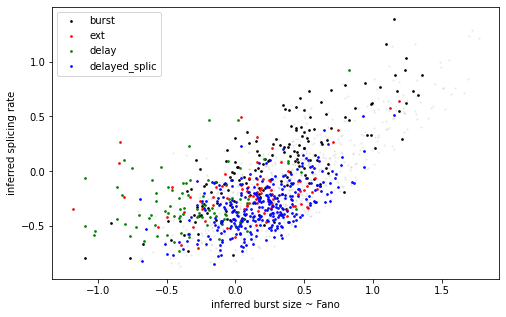

In [319]:
# plt.scatter(,3,'gray',alpha=0.4)

plt.subplots(1,1,figsize=(8,5))
x=traces[2][:,pars[0],:].mean(1)
y=traces[2][:,pars[1],:].mean(1)

plt.scatter(x,y,2,'gray',alpha=0.1)

bfs_targ = wts[0]
cf = bfs_targ>0.99
# cf = bfs_targ>np.quantile(bfs_targ,0.95)
plt.scatter(x[cf],y[cf],3,'k',alpha=0.9,label='burst')


bfs_targ = wts[1]
cf = bfs_targ>0.99
# cf = bfs_targ>np.quantile(bfs_targ,0.95)
plt.scatter(x[cf],y[cf],3,'r',alpha=0.9,label='ext')

bfs_targ = wts[2]
cf = bfs_targ>0.99
# cf = bfs_targ>np.quantile(bfs_targ,0.95)
plt.scatter(x[cf],y[cf],3,'g',alpha=0.9,label='delay')

bfs_targ = wts[3]
cf = bfs_targ>0.99
# cf = bfs_targ>np.quantile(bfs_targ,0.95)
plt.scatter(x[cf],y[cf],3,'b',alpha=0.9,label='delayed_splic')
# plt.xlabel('mean')
plt.xlabel('inferred burst size ~ Fano')
plt.ylabel('inferred splicing rate')
plt.legend()

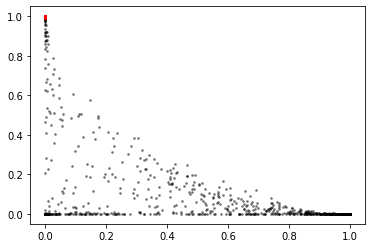

In [320]:
plt.scatter(wts[0],wts[1],3,'k',alpha=0.4)
cf = wts[1]>0.99
plt.scatter(wts[0][cf],wts[1][cf],3,'r')

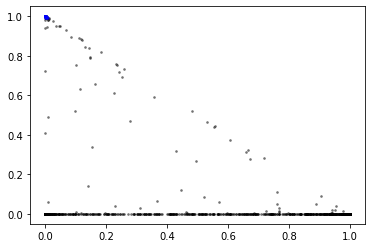

In [321]:
plt.scatter(wts[0],wts[3],3,'k',alpha=0.4)
cf = wts[3]>0.99
plt.scatter(wts[0][cf],wts[3][cf],3,'b',alpha=0.4)

In [322]:
cf.sum()

308